# LASSO

We wish to recover a sparse vector $x \in \mathbf{R}^n$ from measurements $y \in \mathbf{R}^m$. Our measurement model tells us that
$$
y = Ax + v,
$$
where $A \in \mathbf{R}^{m \times n}$ is a known matrix and $v \in \mathbf{R}^m$ is unknown measurement error. The entries of $v$ are drawn IID from the distribution $\mathcal{N}(0, \sigma^2)$.

We can first try to recover $x$ by solving the optimization problem

\begin{array}{ll} \mbox{minimize} & ||Ax - y||^2_2 + \gamma ||x||^2_2.\\
\end{array}

This problem is called ridge regression.

The code below defines $n$, $m$, $A$, $x$, and $y$. Use CVXPY to estimate $x$ from $y$ using ridge regression. Try multiple values of $\gamma$. Use the plotting code to compare the estimated $x$ with the true $x$.

A more successful approach is to solve the LASSO problem

\begin{array}{ll} \mbox{minimize} & ||Ax - y||^2_2 + \gamma \|x\|_1.\\
\end{array}


How many measurements $m$ are needed to find an accurate $x$ with ridge regression? How about with the LASSO?

In [118]:
# Ridge regression vs. LASSO to estimate sparse x.
import numpy as np
import scipy.sparse as sp
np.random.seed(1)

n = 200
m = 200
true_x = 100*sp.rand(n, 1, 0.1)
A = np.random.randn(m, n)
sigma = 1
v = np.random.normal(0, sigma, (m, 1))
y = A*true_x + v

In [119]:
import cvxpy as cvx

# Construct the problem.
x = cvx.Variable(n)
# TODO: your code here
gamma = [0.01, 0.1, 1]
ridge_values = []
for i in range(3):
    ridge_cost = cvx.norm(A*x - y.ravel()) + gamma[i] * cvx.norm(x)
    prob = cvx.Problem(cvx.Minimize(ridge_cost))
    prob.solve()
    ridge_values.append(x.value)

lasso_values = []
for i in range(3):
    lasso_cost = cvx.norm(A*x - y.ravel()) + gamma[i] * cvx.norm(x,1)
    prob = cvx.Problem(cvx.Minimize(lasso_cost))
    prob.solve()
    lasso_values.append(x.value)

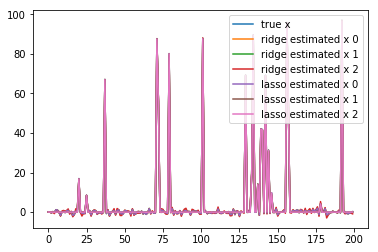

In [120]:
# Plot estimate of x against true x.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(n), true_x.todense(),  label="true x")
for i in range(3):
    plt.plot(range(n), ridge_values[i],  label = "ridge estimated x " + str(i))
for i in range(3):
    plt.plot(range(n), lasso_values[i],  label = "lasso estimated x " + str(i))
plt.legend(loc='upper right')
plt.show()

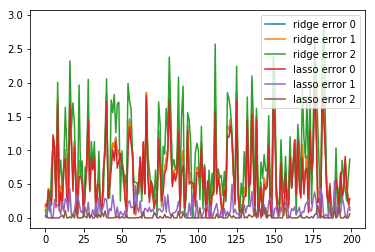

In [121]:
# Plot erros
for i in range(3):
    plt.plot(range(n), np.abs(np.asarray(true_x.todense()).ravel() - ridge_values[i]),  label = "ridge error " + str(i))
for i in range(3):
    plt.plot(range(n), np.abs(np.asarray(true_x.todense()).ravel() - lasso_values[i]),  label = "lasso error " + str(i))
plt.legend(loc='upper right')
plt.show()